217
173


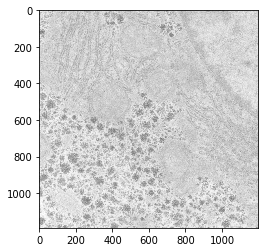

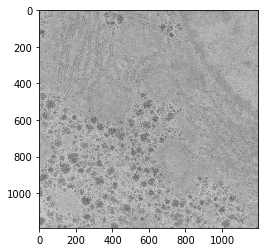

In [1]:
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

im1 = Image.open('low-contrast-03g.jpg')
fig1 = plt.figure()
plt.imshow(im1, cmap='gray', vmin=0, vmax=255)
a = np.array(im1)
print(a[100][100])
b = (a * 0.8).astype(int)
print(b[100][100])
fig2 = plt.figure()
plt.imshow(b, cmap='gray', vmin=0, vmax=255)

In [2]:
h_a = np.histogram(a,bins=256)
p_a = h_a[0] / (a.shape[0] * a.shape[1])
h_b = np.histogram(b,bins=256)
p_b = h_b[0] / (b.shape[0] * b.shape[1])
m_a = 0
m_b = 0
for i in range(256):
    m_a += i * p_a[i]
    m_b += i * p_b[i]
print(m_a)
print(m_b)

168.2844297509095
167.50858942065486


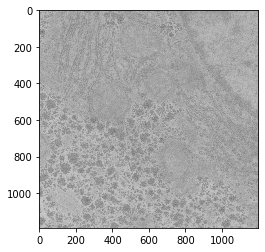

In [3]:
c = np.zeros(a.shape, dtype = np.uint8)
for x in range(a.shape[0]):
    for y in range(a.shape[1]):
        if a[x][y] < m_a:
            c[x][y] = int(a[x][y]*0.95)
        else:
            c[x][y] = int(a[x][y]*0.8)
fig2 = plt.figure()
plt.imshow(c, cmap='gray', vmin=0, vmax=255)


In [ ]:
im3 = Image.fromarray(c)
im3.show()

In [ ]:
h_c = np.histogram(c,bins=256)
cdf_c = np.zeros(256)
for i in range(256):
    cdf_c[i] = cdf_c[i-1] + h_c[0][i]
d = np.zeros(a.shape , dtype = np.uint8)
t = 255/(a.shape[0]*a.shape[1])
for x in range(a.shape[0]):
    for y in range(a.shape[1]):
        d[x][y] = cdf_c[c[x][y]] * t
fig3 = plt.figure()
plt.imshow(d, cmap='gray', vmin=0, vmax=255)

In [ ]:
im3 = Image.fromarray(c)
im3.show()